In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.stats as st
clients=pd.read_csv("dataset_P4/customers.csv")
transactions=pd.read_csv("dataset_P4/transactions.csv")
produits=pd.read_csv("dataset_P4/products.csv")

In [2]:
#Toutes ces manipulations sont expliquées dans le notebook NettoyageBDD
transactionsclean=transactions.loc[transactions["id_prod"]!="T_0"]
produitsclean=produits.loc[produits["price"]>=0]
clientsclean=clients[clients.client_id!="ct_1"]
clientsclean=clientsclean[clientsclean.client_id!="ct_0"]

In [3]:
transactions_prix=pd.merge(transactionsclean,produitsclean,on="id_prod",how="left")
transactions_prix["categ"] = transactions_prix[["categ"]].fillna(value=0)
transactions_prix["price"] = transactions_prix[["price"]].fillna(value=11.732795)

In [4]:
transactions_full=pd.merge(transactions_prix,clientsclean, on="client_id",how="left")

In [5]:
transactions_full.date=pd.to_datetime(transactions_full.date)
# IMPORTANT pour la reconnaissance du format et les manipulations par après

In [6]:
transactions_full["age"]=2022-transactions_full["birth"]
#Conversion date de naissance => age

In [7]:
transactions_noOutliers=transactions_full.loc[(transactions_full["client_id"]!="c_4958") & (transactions_full["client_id"]!="c_1609")]
#La table transactions sans les clients perturbateurs

--------------------
0
moyenne:
 11.732794627383296
médiane:
 10.32
variance:
 57.24064814679384
std(standard deviation):
 7.565754962116724


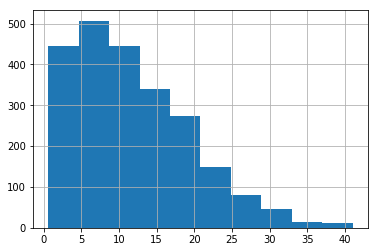

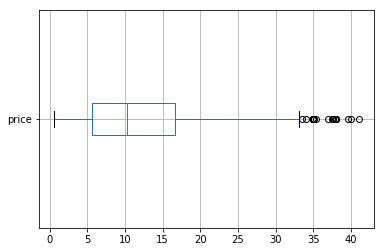

--------------------
1
moyenne:
 25.531420838971624
médiane:
 22.99
variance:
 237.93561274812913
std(standard deviation):
 15.42516167656369


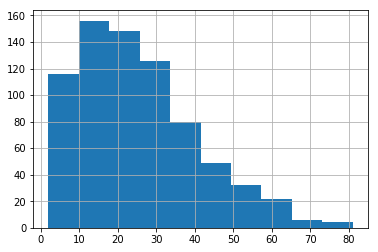

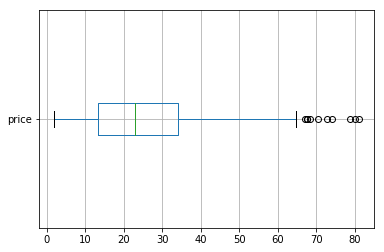

--------------------
2
moyenne:
 108.35468619246883
médiane:
 101.99
variance:
 2456.3354518969077
std(standard deviation):
 49.561431092099305


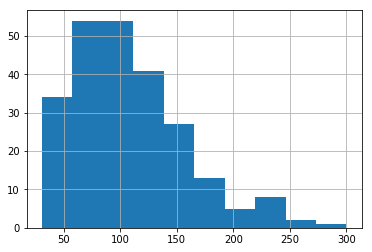

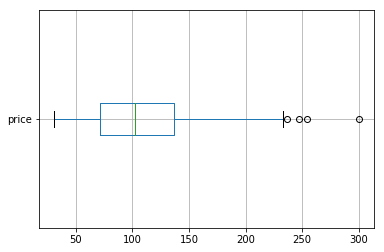

In [8]:
#Analyse par catégorie des produits que nous vendons
for cat in produitsclean["categ"].unique():
    sous_echantillon = produitsclean[produitsclean.categ == cat]
    print("-"*20)
    print(cat)
    print("moyenne:\n",sous_echantillon["price"].mean())
    print("médiane:\n",sous_echantillon["price"].median())
    print("variance:\n",sous_echantillon["price"].var())
    print("std(standard deviation):\n",sous_echantillon["price"].std())
    sous_echantillon["price"].hist()
    plt.show()
    sous_echantillon.boxplot(column="price",vert=False)
    plt.show()



In [9]:
#Moyenne d'âge des clients
2022-clientsclean.birth.mean()
#transactions_full.date.max() donne la date fictive a laquelle a lieu cette analyse : 2022

43.72439392181877

In [10]:
#AVEC OUTLIERS

#ChiffreAffaires=transactions_full[["price","date"]].set_index("date").groupby(pd.Grouper(freq="M")).sum()
#ChiffreAffaires["Chiffre d'affaires"]=ChiffreAffaires["price"]
#ChiffreAffaires=ChiffreAffaires.drop(columns="price")

In [11]:
#SANS OUTLIERS

ChiffreAffaires=transactions_noOutliers[["price","date"]].set_index("date").groupby(pd.Grouper(freq="M")).sum()
ChiffreAffaires["Chiffre d'affaires"]=ChiffreAffaires["price"]
ChiffreAffaires=ChiffreAffaires.drop(columns="price")
#Ceci nous donne la somme des ventes par mois (M comme month)
#Elle peut etre changée en somme des ventes par semaine (W comme Week) ou par jour (D comme Day)

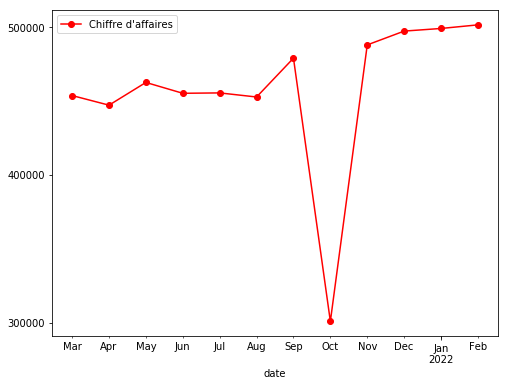

In [12]:
ChiffreAffaires.plot(figsize=(8,6),marker="o",color="red",yticks=(300000,400000,500000))
#Evolution du chiffre d'affaires au cours des 12 derniers mois

#plt.savefig("CA12Mois.jpg")

In [13]:
ChiffreAffaires.mean()
#Chiffre d'affaires mensuel moyen de 457 626

Chiffre d'affaires    457626.808157
dtype: float64

In [14]:
ChiffreAffaires=ChiffreAffaires.reset_index()
ChiffreAffaires.loc[ChiffreAffaires["date"]!="2021-10-31"].mean()
#Seulement 14000 de plus sans le mois d'Octobre... Pas une si grosse différence !

Chiffre d'affaires    471878.509847
dtype: float64

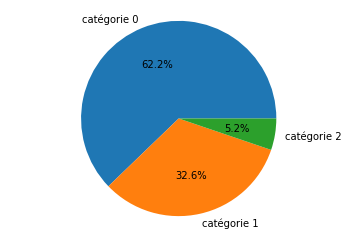

In [15]:
#AVEC OUTLIERS

labels="catégorie 0","catégorie 1","catégorie 2"
sizes=[209529,109735,17552]
fig1,ax1=plt.subplots()
ax1.pie(sizes,labels=labels,autopct="%1.1f%%")
ax1.axis("equal")
plt.show()
#répartition des ventes par catégorie en pourcentage

In [16]:
transactions_noOutliers.groupby(by="categ").id_prod.count()

categ
0.0    199240
1.0    106257
2.0     15902
Name: id_prod, dtype: int64

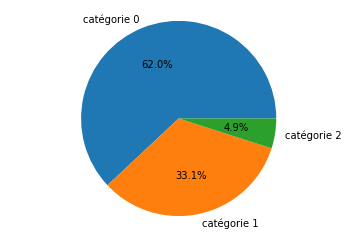

In [17]:
#SANS OUTLIERS

labels="catégorie 0","catégorie 1","catégorie 2"
sizes=[199240,106257,15902]
fig1,ax1=plt.subplots()
ax1.pie(sizes,labels=labels,autopct="%1.1f%%")
ax1.axis("equal")
plt.show()
#répartition des ventes par catégorie en pourcentage
#fig1.savefig("PieVenteParCateg.jpg")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa208878e48>]],
      dtype=object)

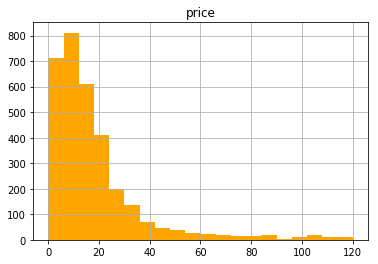

In [18]:
produitsclean.hist(column="price", color="orange",bins=20,range=(0,120))
#histogramme du prix des articles limité a 120
#plt.savefig("HistoPrixProd.jpg")

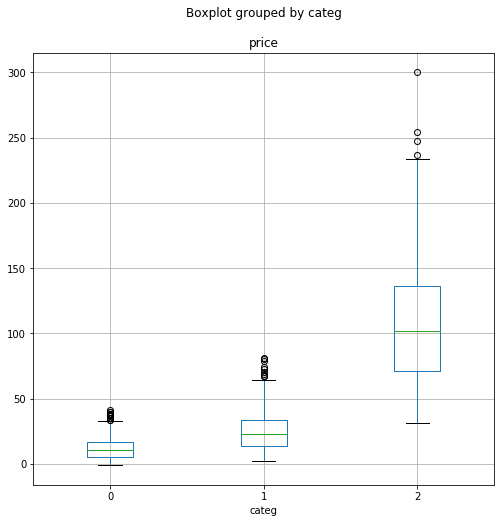

In [19]:
produits.boxplot(column="price",by="categ",figsize=(8,8))
#Prix des articles en fonction de la catégorie
#plt.savefig("MoustachePrixCateg.jpg")

In [20]:
X = "sex"
Y = "categ"

c = transactions_full[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()

tx = transactions_full[X].value_counts()
ty = transactions_full[Y].value_counts()

cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total","Total"] = len(transactions_full)
cont

#Tableau de contingence permettant d'évaluer la corrélation entre
#le sexe des clients et la catégorie de produits achetés.

categ,0.0,1.0,2.0,Total
sex,,,,
f,103846.0,55469.0,8260.0,167575.0
m,105683.0,54266.0,9292.0,169241.0
total,209529.0,109735.0,17552.0,336816.0


In [21]:
n=len(transactions_full)
SexCategProduit=(cont/n)*100
#Pourcentage des achats répartis par sexe et catégorie

In [22]:
SexCategProduit
#SexCategProduit.to_csv("SexCategProduit.csv")
#enregistré dans le dossier Images

categ,0.0,1.0,2.0,Total
sex,,,,
f,30.831671,16.468636,2.452378,49.752684
m,31.377072,16.111467,2.758776,50.247316
total,62.208743,32.580103,5.211154,100.000000


In [23]:
#Nous partons de l'hypothèse nulle qu'il n'y a pas de corrélation 
#entre le sexe du client et la catégorie de produits achetés
#autrement dit que ces variables sont indépendantes
tx=pd.DataFrame(tx)
ty=pd.DataFrame(ty)
tx.columns=["foo"]#indispensable pour le .dot() après
ty.columns=["foo"]#indispensable pour le .dot() après
n=len(transactions_full)
indep=tx.dot(ty.T)/n

In [24]:
indep
#tableau du cas d'INDEPENDANCE : la répartition entre H et F dans les != catégories est égale.

,0.0,1.0,2.0
m,105282.69883,55138.892259,8819.408912
f,104246.30117,54596.107741,8732.591088


In [138]:
produitsclean.count()

id_prod    3286
price      3286
categ      3286
dtype: int64

In [25]:
c
#notre tableau de base

categ,0.0,1.0,2.0
sex,,,
f,103846,55469,8260
m,105683,54266,9292


In [26]:
mesure=(c-indep)**2/indep
#mesure les écarts a la valeur attendue

In [27]:
mesure
#"xi_ij"

categ,0.0,1.0,2.0
f,1.537139,13.955956,25.575724
m,1.522007,13.818575,25.323958


In [28]:
xi_n=mesure.sum().sum()

In [29]:
xi_n
#Plus Xi_n est grand, moins l'hypothèse d'indépendance est valide.

81.73335807676145

In [30]:
(mesure/xi_n)*100
#% de contribution à la non-indépendance

categ,0.0,1.0,2.0
f,1.880675,17.074982,31.291659
m,1.862162,16.906897,30.983625


In [31]:
st.chi2_contingency(c)
#donne le chi2 ( = xi_n calculé plus haut) , la p-valeur du test, les "degrés de libertés" (les deux sexes ici)
#les fréquences attendues (=indep calulé plus haut)

(81.73335807676145,
 1.7857752515034613e-18,
 2,
 array([[104246.30117037,  54596.10774132,   8732.59108831],
        [105282.69882963,  55138.89225868,   8819.40891169]]))

In [32]:
#Les conclusions : l'hypothèse d'indépendance n'est pas valide, autrement dit
#il existe une corrélation entre le sexe du client et la catégorie de produits achetés
#la p-value extrêmement faible indique clairement que le test est significatif

In [33]:
clientsclean["age"]=2022-clientsclean["birth"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa20898fe80>]],
      dtype=object)

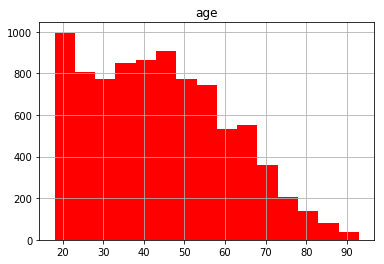

In [34]:
clientsclean.hist(column="age",color="red",bins=15)
#plt.savefig("HistoAge.jpg")

In [35]:
#SANS OUTLIERS !!!

#Pour le calcul du montant des achats moyen par âge
AchatParAge=[]
for i in range(transactions_noOutliers.age.min(),transactions_noOutliers.age.max()+1):
    datenaissance=i
    value=transactions_noOutliers.groupby(by="age").get_group(i).groupby("client_id").sum().price.mean()
    AchatParAge.append([datenaissance,value])
    
AchatParAge

[[18, 675.9450343249428],
 [19, 610.0785517241383],
 [20, 620.1500192758625],
 [21, 679.0518400000002],
 [22, 589.0562705514707],
 [23, 610.8551898734175],
 [24, 710.4722627737231],
 [25, 582.475430463576],
 [26, 700.9831843575422],
 [27, 620.3420571428571],
 [28, 624.7118768910257],
 [29, 633.4494852941176],
 [30, 624.4113978494627],
 [31, 764.8273377586208],
 [32, 784.3929918581082],
 [33, 721.8340729391897],
 [34, 782.7982878743961],
 [35, 719.2402180965911],
 [36, 759.3454028078824],
 [37, 828.8692416956527],
 [38, 864.0752875161294],
 [39, 858.7525109259265],
 [40, 703.4738197120417],
 [41, 741.5773404848486],
 [42, 758.2471873157893],
 [43, 761.550124511628],
 [44, 804.9159053015076],
 [45, 738.8137976420452],
 [46, 692.7829265838511],
 [47, 750.9682062738854],
 [48, 790.3952049687507],
 [49, 727.3159203642387],
 [50, 729.6533615248226],
 [51, 474.0720670496896],
 [52, 482.7504938271605],
 [53, 830.2390731337987],
 [54, 811.9970385359119],
 [55, 472.09986301369844],
 [56, 445.097

In [36]:
AchatParAge=pd.DataFrame(AchatParAge)

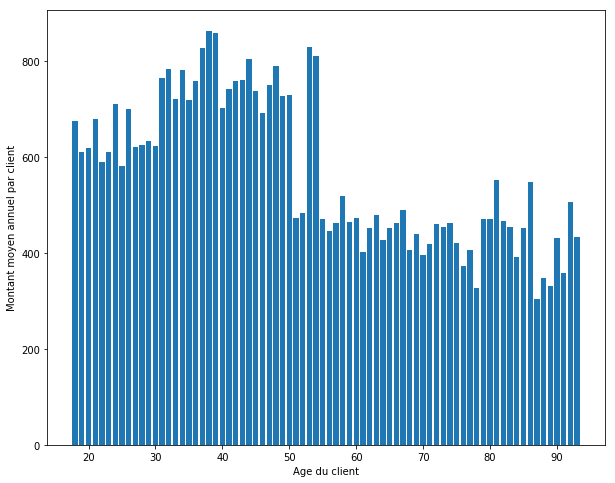

In [37]:
plt.figure(figsize=(10,8))
plt.bar(AchatParAge[0],AchatParAge[1])
plt.xlabel("Age du client")
plt.ylabel("Montant moyen annuel par client")
#plt.savefig("MontantXNaissance.jpg")
plt.show()
#Montre le montant moyen annuel des achats


In [38]:
RcoeffLin=st.pearsonr(AchatParAge[0],AchatParAge[1])[0]
print(RcoeffLin)
#coefficient de corrélation linéaire élevé de -0,73
#Attention effectuer le calcul sur la moyenne ou sur les données brutes est très différent

-0.73473442131872


In [39]:
st.pearsonr(transactions_full.age,transactions_full.price)[0]
#Sur les données brutes le liens "direct" entre l'âge du client et le prix de la transactions n'apparait pas.

-0.211505748899643

In [40]:
Rcarre=RcoeffLin**2
print(Rcarre)
#Coefficient de détermination = mesure de la qualité de prédiction d'une régression linéaire
# = pourcentage de variation expliqué

0.5398346698705544


In [41]:
def eta_squared(x,y):
    moyenne_y=y.mean()
    classes= []
    for classe in x.unique():
        yi_classe=y[x==classe]
        classes.append({"ni":len(yi_classe),
                       "moyenne_classe":yi_classe.mean()})
    SCT= sum([(yj-moyenne_y)**2 for yj in y])
    SCE= sum([c["ni"]*(c["moyenne_classe"]-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [42]:
Etacarre= eta_squared(produitsclean.categ,produitsclean.price)
#Etacarre = SCE(Som.carrés.expli)/SCT(Som.carrés.totales) = Vinterclasse/Vtotale
#SCT=SCE+SCR(Som.carrés.résid)
#Rapport de corrélation: si =0, les moyennes ( de prix ) par classe ( catégorie ) sont égales
                        #si =1, les moyennes ( de prix ) par classe ( catégorie ) sont différents

In [43]:
Etacarre
#Effectivement on sait déja que les prix varient fortement en fonction de la catégorie.
#0,69 est élevé et confirme

0.6951593460624856

In [44]:
#SANS OUTLIERS !!

#Pour le calcul du panier moyen
PanierMoyen=[]
for i in range(transactions_noOutliers.age.min(),transactions_noOutliers.age.max()+1):
    age=i
    value=transactions_noOutliers.groupby(by="age").get_group(i).groupby(by="session_id").count()["id_prod"].mean()
    PanierMoyen.append([age,value])
    
PanierMoyen

[[18, 1.7570540411286466],
 [19, 1.724901185770751],
 [20, 1.7429467084639498],
 [21, 1.73231031543052],
 [22, 1.8432203389830508],
 [23, 1.7919117647058824],
 [24, 1.7387453874538745],
 [25, 1.8581788879935537],
 [26, 1.7140361094933023],
 [27, 1.7895752895752897],
 [28, 1.774891774891775],
 [29, 1.788477366255144],
 [30, 1.7328244274809161],
 [31, 2.4086907128656634],
 [32, 2.4229828850855744],
 [33, 2.4119217081850532],
 [34, 2.4343731606827546],
 [35, 2.4156327543424316],
 [36, 2.4199754400327467],
 [37, 2.34577034416211],
 [38, 2.430911680911681],
 [39, 2.3911870503597124],
 [40, 2.4318017801299012],
 [41, 2.3969564095950475],
 [42, 2.395697522816167],
 [43, 2.428459734167318],
 [44, 2.434860202260559],
 [45, 2.43144867750546],
 [46, 2.3843612334801763],
 [47, 2.422757697456493],
 [48, 2.4451450189155106],
 [49, 2.4695446481371968],
 [50, 2.4156923076923076],
 [51, 1.4114002478314747],
 [52, 1.4442752740560292],
 [53, 1.3193775472397185],
 [54, 2.0602632186561993],
 [55, 1.4167812

In [45]:
PanierMoyen=pd.DataFrame(PanierMoyen)
PanierMoyen.columns=["age","Nb_articles"]

Text(0,0.5,"Moyenne du nombre d'articles par session")

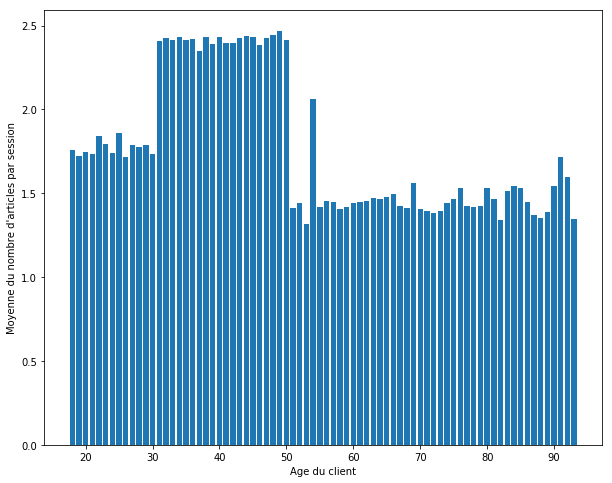

In [46]:
plt.figure(figsize=(10,8))
plt.bar(PanierMoyen.age,PanierMoyen.Nb_articles)
plt.xlabel("Age du client")
plt.ylabel("Moyenne du nombre d'articles par session")
#plt.savefig("NbArticleXNaissance.jpg")

In [47]:
st.pearsonr(PanierMoyen.age,PanierMoyen.Nb_articles)[0]
#Avoir les données "les plus brutes" possibles
#Mais ici le panier moyen est forcément le résultat d'un calcul, donc ca semble correct.

-0.5936247505024873

In [48]:
PanierMoyen.mean()
#Panier moyen général de 1,76 articles

age            55.500000
Nb_articles     1.767478
dtype: float64

In [49]:
#SANS OUTLIERS !!!

AchatParCateg=[]
f=lambda x:(x/totalTransactions)*100
#On crée la liste vide ainsi que la fonction qui transforme en pourcentage
for i in range(transactions_full.age.min(),transactions_full.age.max()+1):#Pour chaque tranche d'age
    age=i
    valeurs=transactions_noOutliers.groupby(by="age").get_group(i).groupby(by="categ")["id_prod"].count()
    totalTransactions=valeurs.sum()
    #on génère les valeurs associées à cette tranche d'âge
    valeurs=valeurs.apply(f)
    #conversion des valeurs en pourcentage
    if len(valeurs)<3:#Malheureusement n'est adapté qu'à ce cas-ci
        valeurs.at[2]=0
    AchatParCateg.append([age,valeurs[0],valeurs[1],valeurs[2]])
    #et on finit par rajouter la ligne complète dans la liste
    
AchatParCateg=pd.DataFrame(AchatParCateg)
#qu'on convertit finalement en df

In [50]:
AchatParCateg.columns=["age","AchatCateg0","AchatCateg1","AchatCateg2"]

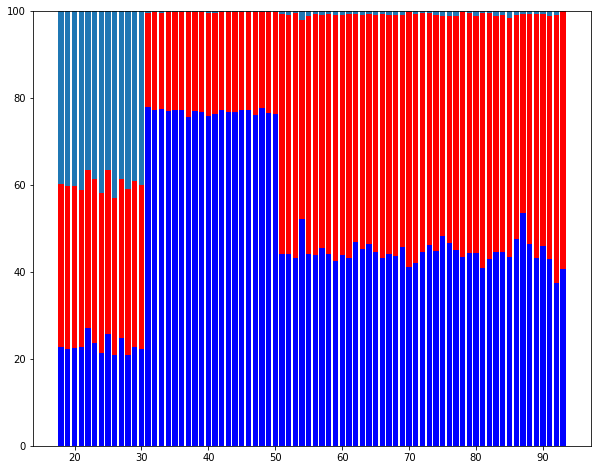

In [51]:
fig,ax=plt.subplots(figsize=(10,8))
width=0.8
p0=plt.bar(AchatParCateg.age,AchatParCateg.AchatCateg0,color="blue")
p1=plt.bar(AchatParCateg.age,AchatParCateg.AchatCateg1, bottom=AchatParCateg.AchatCateg0,color="red")
p2=plt.bar(AchatParCateg.age,AchatParCateg.AchatCateg2, bottom=AchatParCateg.AchatCateg1+AchatParCateg.AchatCateg0)
#plt.savefig("AchatParCategXNaissance.jpg")
plt.show()

In [52]:
#SANS OUTLIERS !!!

freqAchatM=[]
#On crée la liste vide

for i in range(transactions_full.age.min(),transactions_full.age.max()+1):#Pour chaque tranche d'age
    age=i
    frequence=transactions_noOutliers.groupby(by="age").get_group(i).groupby(by="client_id")["id_prod"].count().mean()
    #on génère les valeurs associées à cette tranche d'âge
    freqAchatM.append([age,frequence])
    #et on finit par rajouter la ligne complète dans la liste
    
freqAchatM=pd.DataFrame(freqAchatM)
#qu'on convertit finalement en df

In [53]:
freqAchatM[1]=freqAchatM[1]/12
#division par 12 pour obtenir la fréq. d'achat mensuel

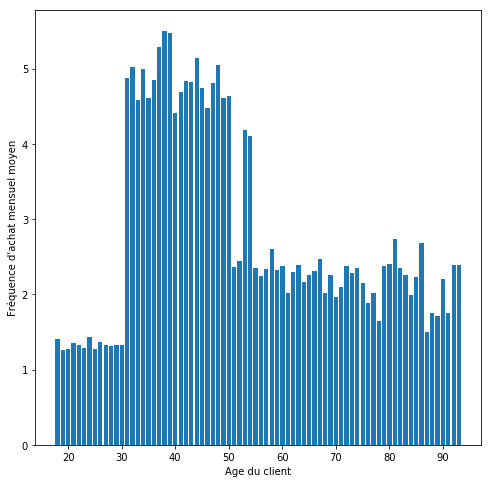

In [54]:
plt.figure(figsize=(8,8))
plt.bar(freqAchatM[0],freqAchatM[1])
plt.xlabel("Age du client")
plt.ylabel("Fréquence d'achat mensuel moyen")
#plt.savefig("FreqMensuelXNaissance.jpg")
plt.show()

In [55]:
st.pearsonr(freqAchatM[0],freqAchatM[1])[0]
#coefficient de corrélation linéaire faible de -0,22

-0.22071890533709917

In [56]:
freqAchatM.mean()
#nombre d'achats mensuel moyen pour tout les âges : 2,8

0    55.500000
1     2.811845
dtype: float64

In [57]:
#SANS OUTLIERS !!!

somme=transactions_noOutliers.groupby(by="client_id").price.sum()
somme=somme.sort_values()
somme=somme.values

In [58]:
X_lorenz=somme.cumsum()/somme.sum()
X_lorenz=np.insert(X_lorenz, 0, 0,)

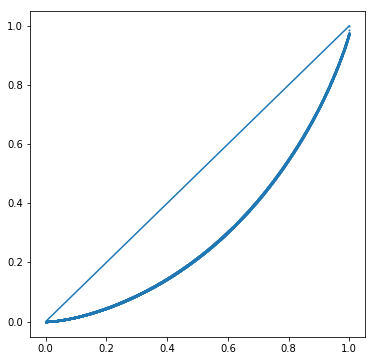

In [59]:
fig,ax=plt.subplots(figsize=(6,6))

ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1),X_lorenz,s=1)

ax.plot([0,1],[0,1])

#fig.savefig("Lorenz.jpg")

In [60]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [61]:
gini(somme)

0.408810516141187

In [62]:
#Transactions
#id_prod PAS UNE VARIABLE
#date= série temporelle = variable continue ===> Changer le format ?? Ou trouver la formule qui agrège
#session_id PAS UNE VARIABLE
#client_id PAS UNE VARIABLE

#Clients
#client_id PAS UNE VARIABLE
#sexe=categorielle=qualitative ===> seule : camembert ; bivariée : boite a moustache(/sexe)
#birth=numérique=quantitative ===> calcul de l'age; +sex pour pyramide des âges

#catégorie de produits X age ; nbr de transactions X age ; date X age ;...

#Produits
#id_prod PAS UNE VARIABLE
#price=numérique continue = quantitative
#categ=qualitative=categorielle ===> categ X age , categ X sexe, categ(nb transactions) X date,... TOUT ESSAYER

In [103]:
#régression linéaire


In [81]:
Clients_montants=transactions_noOutliers[["client_id","price"]].groupby(by="client_id").sum()

In [86]:
Clients_montants=Clients_montants.reset_index()

In [97]:
Clients_montants=Clients_montants.drop(columns=["sex","birth"])

In [94]:
Clients_montants=pd.merge(Clients_montants,clientsclean,on="client_id")

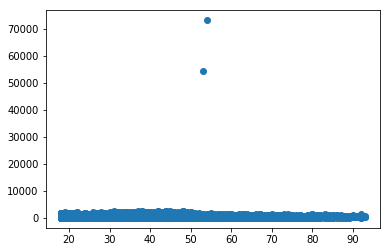

In [98]:
plt.scatter(Clients_montants.age,Clients_montants.price)

In [105]:
Clients_montants_no_outliers=Clients_montants.loc[(Clients_montants["client_id"]!="c_3454")&(Clients_montants["client_id"]!="c_6714")]

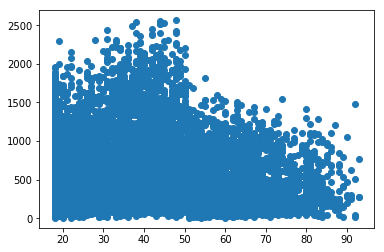

In [106]:
plt.scatter(Clients_montants_no_outliers.age,Clients_montants_no_outliers.price)

In [112]:
import statsmodels.regression.linear_model as sm
Y = Clients_montants_no_outliers["price"]
X = Clients_montants_no_outliers[["age"]]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params["age"],result.params['intercept']

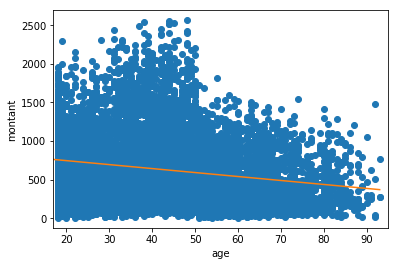

In [124]:
plt.plot(Clients_montants_no_outliers.age,Clients_montants_no_outliers.price, "o")
plt.plot(np.arange(94),[a*x+b for x in np.arange(94)])
plt.xlim(17,95)
plt.xlabel("age")
plt.ylabel("montant")
plt.show()

In [125]:
a , b

(-5.146106693529552, 849.0808024637511)

In [1]:
result

NameError: name 'result' is not defined

In [136]:
import random
Nouveaux_clients=[]
for i in range (1000):
    age=random.randrange(18,94,100)
    Nouveaux_clients.append(age)

In [137]:
Nouveaux_clients

[18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
